<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Car Acceptability Dataset

*   buying: buying price
*   maint: price of the maintenance
*   doors: number of doors
*   persons: capacity in terms of persons to carry
*   lug_boot: the size of luggage boot
*   safety: estimated safety of the car
*   class: unacceptable, acceptable, good, very good

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [4]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Ganti NULL jadi None di bagian df health.issues

In [6]:
df['Health_Issues'] = df['Health_Issues'].fillna('None')

cek lagi apakah ada yang null ngga 

In [7]:
print("Jumlah NaN di Health_Issues:", df['Health_Issues'].isna().sum())


Jumlah NaN di Health_Issues: 0


kalau sudah nol sekarang liat distribusi kelas

In [8]:
print(df['Health_Issues'].value_counts())

Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64


### Step 3: Visualisasi Distribusi Target

/var/folders/qp/9d41pw055glbg836dczy53cr0000gn/T/ipykernel_61207/995938030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Health_Issues', data=df, order=df['Health_Issues'].value_counts().index, palette="viridis")


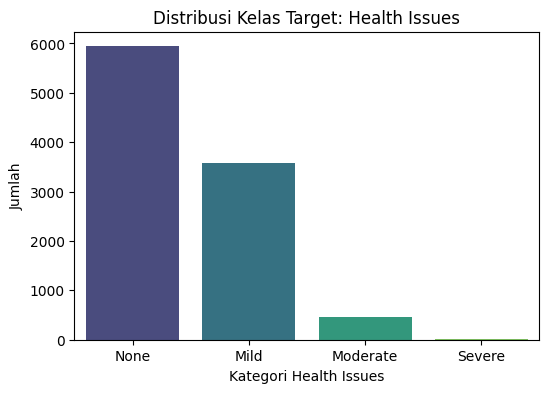

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi target Health_Issues
plt.figure(figsize=(6,4))
sns.countplot(x='Health_Issues', data=df, order=df['Health_Issues'].value_counts().index, palette="viridis")
plt.title("Distribusi Kelas Target: Health Issues")
plt.xlabel("Kategori Health Issues")
plt.ylabel("Jumlah")
plt.show()

Interpretasi:
Mayoritas responden tidak mengalami masalah kesehatan (None).
Sebagian mengalami masalah Mild, jumlah Moderate jauh lebih sedikit, dan Severe sangat jarang.
Hal ini menunjukkan dataset imbalanced → model bisa cenderung bias ke kelas mayoritas.

/var/folders/qp/9d41pw055glbg836dczy53cr0000gn/T/ipykernel_61207/1169109630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Health_Issues', y='Coffee_Intake', data=df, order=['None','Mild','Moderate','Severe'], palette="Set2")


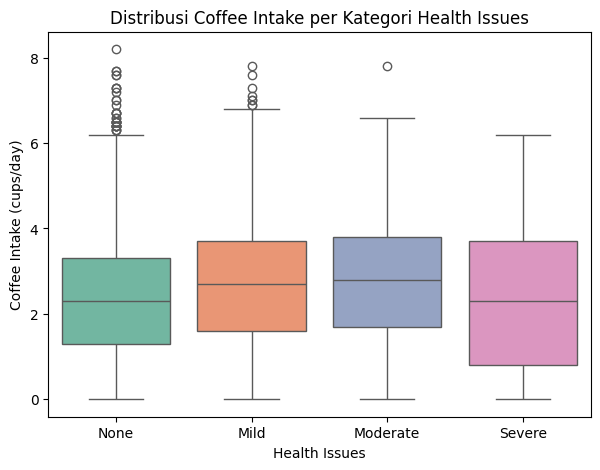

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Health_Issues', y='Coffee_Intake', data=df, order=['None','Mild','Moderate','Severe'], palette="Set2")
plt.title("Distribusi Coffee Intake per Kategori Health Issues")
plt.xlabel("Health Issues")
plt.ylabel("Coffee Intake (cups/day)")
plt.show()

Interpretasi: Grafik menunjukkan bahwa responden dengan kategori Mild dan Moderate cenderung memiliki konsumsi kopi lebih tinggi dibanding kategori None. Pada kategori Severe jumlah data sangat sedikit, namun tetap terlihat beberapa responden dengan konsumsi kopi cukup tinggi.

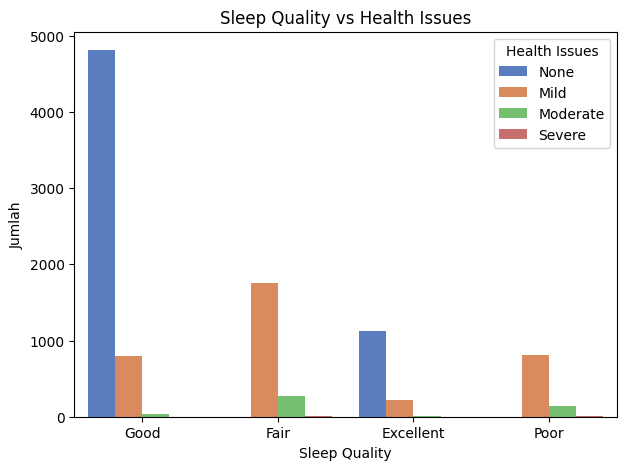

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='Sleep_Quality', hue='Health_Issues', data=df, palette="muted")
plt.title("Sleep Quality vs Health Issues")
plt.xlabel("Sleep Quality")
plt.ylabel("Jumlah")
plt.legend(title="Health Issues")
plt.show()


Interpretasi: Grafik hubungan Sleep Quality dengan Health Issues memperlihatkan pola yang konsisten dengan literatur kesehatan. Responden yang tidak memiliki masalah kesehatan (None) didominasi oleh kualitas tidur Good dan Excellent, menunjukkan bahwa kualitas tidur yang baik berhubungan dengan kondisi kesehatan yang lebih baik. Sebaliknya, kategori Mild dan Moderate lebih banyak ditemukan pada kualitas tidur Fair dan Poor, yang menandakan adanya korelasi antara kurangnya kualitas tidur dengan munculnya masalah kesehatan. Untuk kategori Severe, meskipun jumlah datanya sedikit, mayoritas responden juga cenderung berada pada kualitas tidur buruk. Hal ini menguatkan dugaan bahwa kualitas tidur merupakan faktor penting yang berkaitan dengan tingkat kesehatan seseorang.

### Step 4: Encode categorical

In [12]:
from sklearn.preprocessing import LabelEncoder

# 1) Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['ID','Health_Issues'])  # ID tidak berguna untuk prediksi
y = df['Health_Issues']

# 2) One-Hot Encoding untuk categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# 3) Label Encoding untuk target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4) Cek hasil
print("Shape fitur sebelum encoding:", X.shape)
print("Shape fitur setelah encoding:", X_encoded.shape)
print("Target classes:", le.classes_)
print("Contoh y_encoded:", y_encoded[:10])


Shape fitur sebelum encoding: (10000, 14)
Shape fitur setelah encoding: (10000, 39)
Target classes: ['Mild' 'Moderate' 'None' 'Severe']
Contoh y_encoded: [2 2 0 0 0 2 0 0 2 0]


### Step 5 : Train/ Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (8000, 39)
Test size: (2000, 39)


In [14]:
X_train.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Gender_Male,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
4820,33,4.4,419.0,7.7,26.6,79,0.5,0,0,False,...,False,False,True,False,True,False,False,False,False,True
2028,37,0.6,57.5,7.6,22.4,70,1.9,0,0,True,...,False,False,True,False,True,False,False,True,False,False
4169,26,4.3,412.6,6.1,25.4,59,6.5,0,0,False,...,True,False,True,False,True,False,False,False,False,False
2313,40,3.0,281.2,8.3,30.4,77,11.6,0,1,True,...,False,False,False,False,True,False,False,False,False,True
542,41,2.0,186.0,8.5,28.0,74,0.1,0,0,False,...,False,False,False,False,True,False,False,False,False,True


In [15]:
X_test.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,Gender_Male,...,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
2803,22,3.7,349.2,7.9,25.0,63,4.0,1,0,False,...,False,False,True,False,True,False,False,True,False,False
5903,47,1.8,173.9,5.0,22.8,73,8.1,0,0,True,...,False,True,False,False,False,True,False,False,True,False
3806,35,4.3,407.5,7.0,28.1,71,14.1,1,0,False,...,False,False,True,False,True,False,False,True,False,False
5352,37,1.1,102.6,6.3,27.3,60,11.5,0,0,True,...,False,False,True,False,True,False,False,False,False,True
2753,33,2.9,271.2,5.9,27.8,58,7.8,0,0,False,...,False,True,False,False,False,True,True,False,False,False


### Step 6: Train decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Model Decision Tree - Gini
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)

# Model Decision Tree - Entropy
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print("Accuracy Decision Tree (Gini):", acc_gini)
print("Accuracy Decision Tree (Entropy):", acc_entropy)


Accuracy Decision Tree (Gini): 0.996
Accuracy Decision Tree (Entropy): 0.996


### Step 7: Naive Bayes (GaussianNB)

In [17]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi
y_pred_nb = nb.predict(X_test)

# Hitung akurasi
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy Naïve Bayes:", acc_nb)


Accuracy Naïve Bayes: 0.7065


### Step 8 : Compare

In [18]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Decision Tree (Gini)", "Decision Tree (Entropy)", "Naïve Bayes"],
    "Accuracy": [acc_gini, acc_entropy, acc_nb]
})

print(results)


                     Model  Accuracy
0     Decision Tree (Gini)    0.9960
1  Decision Tree (Entropy)    0.9960
2              Naïve Bayes    0.7065


In [27]:
from sklearn.metrics import classification_report

# Decision Tree (Entropy)
print("=== Decision Tree (Entropy) ===")
print(classification_report(y_test, y_pred_entropy, target_names=le.classes_))

# Naïve Bayes
print("=== Naïve Bayes ===")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


=== Decision Tree (Entropy) ===
              precision    recall  f1-score   support

        Mild       0.99      1.00      0.99       716
    Moderate       0.99      0.95      0.97        93
        None       1.00      1.00      1.00      1188
      Severe       1.00      1.00      1.00         3

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

=== Naïve Bayes ===
              precision    recall  f1-score   support

        Mild       0.89      0.27      0.42       716
    Moderate       0.15      0.30      0.20        93
        None       0.85      1.00      0.92      1188
      Severe       0.01      0.67      0.02         3

    accuracy                           0.71      2000
   macro avg       0.48      0.56      0.39      2000
weighted avg       0.84      0.71      0.71      2000



In [ ]:
new_data = {
    'Age': 28,
    'Gender': 'Male',
    'Country': 'Brazil',
    'Occupation': 'Student',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 'Poor',
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 'High',
    'Physical_Activity_Hours': 2,
    'Smoking': 1,   # Yes = 1
    'Alcohol_Consumption': 1  # Yes = 1
}


# Convert new_data ke DataFrame
new_df = pd.DataFrame([new_data])

new_df_encoded = pd.get_dummies(new_df, drop_first=True)

new_df_encoded = new_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Prediksi dengan model terbaik (Decision Tree)
prediction = dt_entropy.predict(new_df_encoded)

# Ubah hasil prediksi (angka) kembali ke label asli
predicted_class = le.inverse_transform(prediction)

print("Prediksi Health Issues:", predicted_class[0])



Prediksi Health Issues: Mild
